In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# tf.keras.preprocessing.image_dataset_from_directory를 통해 directory에서 데이터 가져오기
test_dir = 'images/mnist_num/after_process/test'

def load_data(path):
    data = tf.keras.preprocessing.image_dataset_from_directory(
        path, label_mode='categorical', color_mode='grayscale',
        image_size=(150,150), batch_size=98
    )

    for i, j in data.take(1):
        X = i
        y = j
        
    data_X = np.squeeze(np.array(X)) / 255
    data_y = np.array(y)

    data_X = data_X.reshape((-1, 150, 150, 1))

    return data_X, data_y

X, y = load_data(test_dir)
X.shape, y.shape

Found 98 files belonging to 10 classes.


((98, 150, 150, 1), (98, 10))

In [3]:
from tensorflow.keras.models import load_model
model = load_model('my_model4.h5')

In [4]:
predict_y = model.predict(X)

In [5]:
for i in range(10):
    print('True :', str(np.argmax(y[i])) , 'Predict :', str(np.argmax(predict_y[i])))

True : 9 Predict : 9
True : 9 Predict : 9
True : 6 Predict : 6
True : 1 Predict : 1
True : 3 Predict : 3
True : 4 Predict : 4
True : 3 Predict : 3
True : 0 Predict : 0
True : 7 Predict : 7
True : 6 Predict : 6


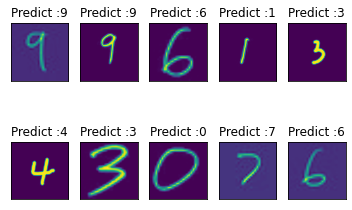

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    plt.imshow(X[i])
    plt.xticks([]), plt.yticks([])
    plt.title("Predict :" + str(np.argmax(predict_y[i])))

In [7]:
pred = []
label = []
for i in predict_y:
    pred.append(np.argmax(i))

for i in y:
    label.append(np.argmax(i))

In [8]:
pred = np.array(pred)
label = np.array(label)

In [17]:
correct = (pred == label).sum()

In [18]:
print('acc : ' , correct/98)

acc :  0.8877551020408163


In [19]:
model.evaluate(X, y)

4/4 [==============================] - 0s 14ms/step - loss: 0.6011 - accuracy: 0.8878


[0.601091742515564, 0.8877550959587097]